In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the dataset
def load_data(file_path):
    return pd.read_csv(file_path)

# Clean the text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Tokenize the text
def tokenize_text(text):
    return word_tokenize(text)

# Remove stop words
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# Lemmatize the tokens
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

# Preprocess the dataset
def preprocess_data(df):
    df['Cleaned_Title'] = df['Title'].apply(clean_text)
    df['Cleaned_Body'] = df['Body'].apply(clean_text)
    df['Tokenized_Title'] = df['Cleaned_Title'].apply(tokenize_text)
    df['Tokenized_Body'] = df['Cleaned_Body'].apply(tokenize_text)
    df['Filtered_Title'] = df['Tokenized_Title'].apply(remove_stop_words)
    df['Filtered_Body'] = df['Tokenized_Body'].apply(remove_stop_words)
    df['Lemmatized_Title'] = df['Filtered_Title'].apply(lemmatize_tokens)
    df['Lemmatized_Body'] = df['Filtered_Body'].apply(lemmatize_tokens)
    return df

# Example usage
if __name__ == "__main__":
    # Make sure to download the necessary NLTK resources
    import nltk
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')

    # Load the dataset (replace 'path_to_your_dataset.csv' with the actual path)
    df = load_data('train.csv')

    # Preprocess the data
    processed_df = preprocess_data(df)

    # Display the processed data
    print(processed_df[['Title', 'Cleaned_Title', 'Lemmatized_Title']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2180\2105066531.py:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2180\2105066531.py:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(t

                                               Title  \
0             Java: Repeat Task Every Random Seconds   
1                  Why are Java Optionals immutable?   
2  Text Overlay Image with Darkened Opacity React...   
3         Why ternary operator in swift is so picky?   
4                 hide/show fab with scale animation   

                                       Cleaned_Title  \
0              java repeat task every random seconds   
1                   why are java optionals immutable   
2  text overlay image with darkened opacity react...   
3          why ternary operator in swift is so picky   
4                  hideshow fab with scale animation   

                                    Lemmatized_Title  
0        [java, repeat, task, every, random, second]  
1                       [java, optionals, immutable]  
2  [text, overlay, image, darkened, opacity, reac...  
3                  [ternary, operator, swift, picky]  
4                  [hideshow, fab, scale, animation

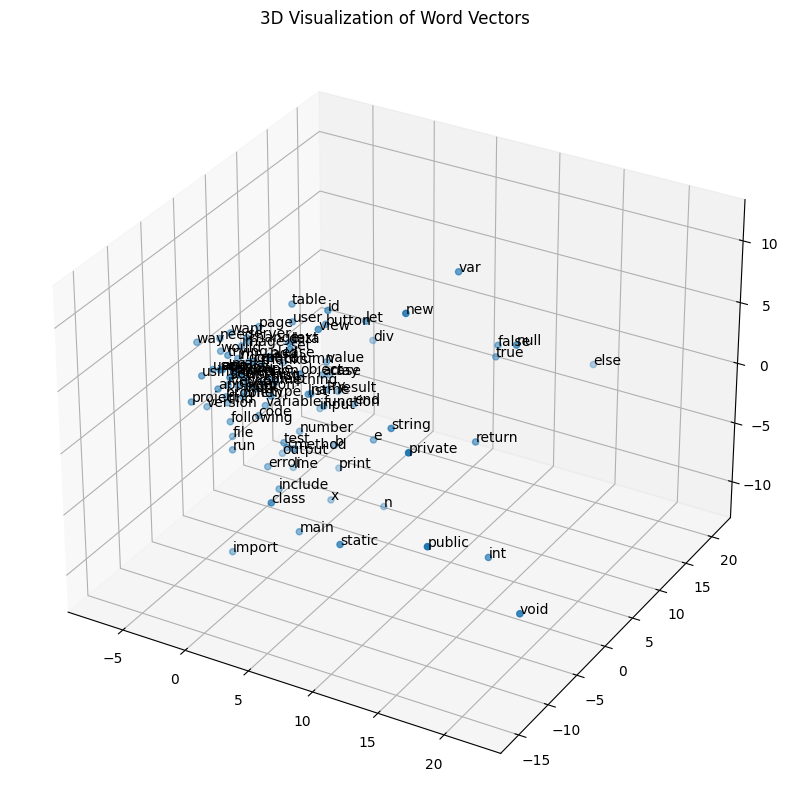

D:\python 3.8.10\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\python 3.8.10\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Similar Questions:
Similarity: 0.9287, Title: Load S3 Data into AWS SageMaker Notebook, Body: <p>I've just started to experiment with AWS SageMaker and would like to load data from an S3 bucket ...
Similarity: 0.9251, Title: How to train TensorFlow network using a generator to produce inputs?, Body: <p>The TensorFlow <a href="https://www.tensorflow.org/versions/r0.10/how_tos/reading_data/index.html...
Similarity: 0.9226, Title: Python JSON dummy data generation from JSON schema, Body: <p>I am looking for a python library in which I can feed in my JSON schema and it generates dummy da...
Similarity: 0.9224, Title: Is there any difference between AES_128_CBC and AES_128_CBC_SHA algoritham?, Body: Is there any difference between AES_128_CBC and AES_128_CBC_SHA algoritham? I have a client document...
Similarity: 0.9221, Title: Import data from excel spreadsheet to django model, Body: <p>I'm building a website that'll have a django backend. I want to be able to serve the medical bill...


D:\python 3.8.10\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\python 3.8.10\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\python 3.8.10\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


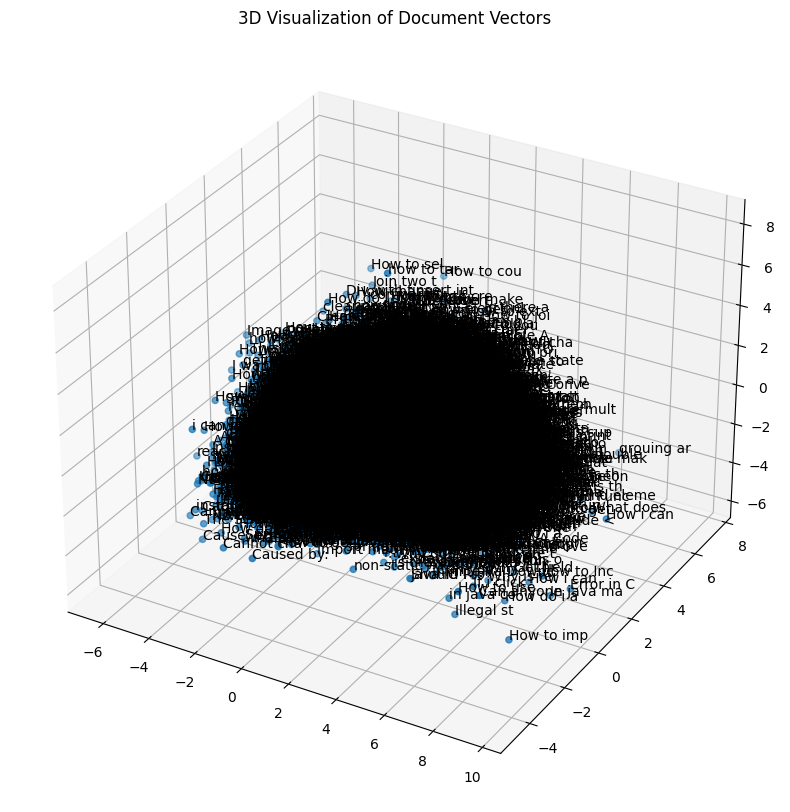

In [5]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from nltk.tokenize import word_tokenize

# Step 1: Create Word2Vec model
def create_word2vec_model(sentences):
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Step 2: Visualize word vectors in 3D
def visualize_word_vectors(model):
    words = list(model.wv.index_to_key)[:100]  # Get the first 100 words
    word_vectors = np.array([model.wv[word] for word in words])

    # Reduce dimensions to 3D
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(word_vectors)

    # Plotting
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2])

    for i, word in enumerate(words):
        ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word)

    ax.set_title('3D Visualization of Word Vectors')
    plt.show()

# Step 3: Calculate cosine similarity
def calculate_cosine_similarity(vec1, vec2):
    if vec1 is None or vec2 is None:
        return -1  # Return a low similarity if one of the vectors is None
    return 1 - cosine(vec1, vec2)

# Step 4: Retrieve similar questions
def retrieve_similar_questions(query, model, df, top_n=5):
    query_tokens = word_tokenize(query.lower())
    query_vector = np.mean([model.wv[word] for word in query_tokens if word in model.wv], axis=0)

    if query_vector is None or np.isnan(query_vector).any():
        print("Query vector is invalid.")
        return []  # Return empty if query vector is invalid

    similarities = []
    for index, row in df.iterrows():
        body_vector = np.mean([model.wv[word] for word in row['Lemmatized_Body'] if word in model.wv], axis=0)

        if body_vector is None or np.isnan(body_vector).any():
            continue  # Skip if body vector is invalid

        sim = calculate_cosine_similarity(query_vector, body_vector)
        if sim != -1:  # Only append if similarity is valid
            similarities.append((sim, row['Title'], row['Body']))

    # Sort by similarity
    similarities.sort(key=lambda x: x[0], reverse=True)
    return similarities[:top_n]


# Step 5: Visualize document vectors
def visualize_document_vectors(model, df):
    document_vectors = []
    titles = []

    for index, row in df.iterrows():
        body_vector = np.mean([model.wv[word] for word in row['Lemmatized_Body'] if word in model.wv], axis=0)

        # Check if body_vector is valid
        if body_vector is not None and not np.isnan(body_vector).any():
            document_vectors.append(body_vector)
            titles.append(row['Title'])

    # Convert to NumPy array
    document_vectors = np.array(document_vectors)

    # Reduce dimensions to 3D
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(document_vectors)

    # Plotting
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2])

    for i, title in enumerate(titles):
        ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], title[:10])  # Show first 10 chars

    ax.set_title('3D Visualization of Document Vectors')
    plt.show()


if __name__ == "__main__":
    # Assuming processed_df is the DataFrame from the previous phase
    # Create Word2Vec model
    model = create_word2vec_model(processed_df['Lemmatized_Body'].tolist())

    # Visualize word vectors
    visualize_word_vectors(model)

    # Example query
    query = "How to use Python for data analysis?"
    similar_questions = retrieve_similar_questions(query, model, processed_df)

    # Display similar questions
    print("Similar Questions:")
    for sim, title, body in similar_questions:
        print(f"Similarity: {sim:.4f}, Title: {title}, Body: {body[:100]}...")  # Display first 100 characters of body

    # Visualize document vectors
    visualize_document_vectors(model, processed_df)


In [6]:
import random

# Function to preprocess a subset of the validation data
def prepare_validation_data(df, sample_size=0.1):
    # Randomly sample a subset of the validation data
    sample_df = df.sample(frac=sample_size, random_state=42)
    # Preprocess the data (using the same preprocessing function from Phase 1)
    sample_df = preprocess_data(sample_df)
    return sample_df


In [12]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn_model(train_df, k=5):
    # Create document vectors for training data
    train_vectors = []
    train_tags = []

    for index, row in train_df.iterrows():
        body_vector = np.mean([model.wv[word] for word in row['Lemmatized_Body'] if word in model.wv], axis=0)

        # Check if body_vector is valid
        if body_vector is not None and not np.isnan(body_vector).any():
            train_vectors.append(body_vector)
            train_tags.append(row['Tags'].split(','))  # Assuming tags are comma-separated

    # Convert to NumPy array
    train_vectors = np.array(train_vectors)

    # Flatten the tags for KNN
    flattened_tags = []
    for tags in train_tags:
        for tag in tags:
            flattened_tags.append(tag.strip())

    # Create a mapping from tags to indices
    tag_to_index = {tag: i for i, tag in enumerate(set(flattened_tags))}
    y_train = [tag_to_index[tag] for tags in train_tags for tag in tags]

    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_vectors, y_train)
    return knn, tag_to_index



In [8]:
def evaluate_tags(knn, validation_df, tag_to_index):
    # Create document vectors for validation data
    validation_vectors = np.array([np.mean([model.wv[word] for word in row['Lemmatized_Body'] if word in model.wv], axis=0) for index, row in validation_df.iterrows()])

    # Predict tags
    predicted_indices = knn.predict(validation_vectors)

    # Map indices back to tags
    index_to_tag = {v: k for k, v in tag_to_index.items()}
    predicted_tags = [index_to_tag[idx] for idx in predicted_indices]

    # Compare with actual tags
    actual_tags = validation_df['Tags'].apply(lambda x: x.split(',')).explode().tolist()
    correct_predictions = sum(1 for pred, actual in zip(predicted_tags, actual_tags) if pred in actual)

    accuracy = correct_predictions / len(actual_tags)
    return accuracy, predicted_tags, actual_tags


In [9]:
def show_examples(predicted_tags, actual_tags, num_examples=5):
    examples = []
    for i in range(len(predicted_tags)):
        examples.append((predicted_tags[i], actual_tags[i]))

    # Show successful predictions
    successful = [ex for ex in examples if ex[0] in ex[1]]
    unsuccessful = [ex for ex in examples if ex[0] not in ex[1]]

    print("Successful Predictions:")
    for ex in successful[:num_examples]:
        print(f"Predicted: {ex[0]}, Actual: {ex[1]}")

    print("\nUnsuccessful Predictions:")
    for ex in unsuccessful[:num_examples]:
        print(f"Predicted: {ex[0]}, Actual: {ex[1]}")


In [13]:
if __name__ == "__main__":
    # Load your training and validation datasets
    train_df = load_data('train.csv')  # Load your training data
    validation_df = load_data('valid.csv')  # Load your validation data

    # Preprocess the training data
    processed_train_df = preprocess_data(train_df)

    # Prepare validation data (10% sample)
    processed_validation_df = prepare_validation_data(validation_df, sample_size=0.1)

    # Train KNN model
    knn_model, tag_to_index = train_knn_model(processed_train_df, k=5)

    # Evaluate tags on validation data
    accuracy, predicted_tags, actual_tags = evaluate_tags(knn_model, processed_validation_df, tag_to_index)

    # Print accuracy
    print(f"Accuracy of the tagging algorithm: {accuracy:.2f}")

    # Show examples of successful and unsuccessful predictions
    show_examples(predicted_tags, actual_tags, num_examples=5)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2180\2105066531.py:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2180\2105066531.py:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
D:\python 3.8.10\lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the Be

Accuracy of the tagging algorithm: 0.12
Successful Predictions:
Predicted: <javascript><jquery>, Actual: <javascript><jquery><html>
Predicted: <python>, Actual: <python><python-3.x>
Predicted: <android>, Actual: <android><android-studio><countdowntimer>
Predicted: <java>, Actual: <java>
Predicted: <ruby>, Actual: <ruby-on-rails><ruby>

Unsuccessful Predictions:
Predicted: <javascript><arrays><string>, Actual: <javascript>
Predicted: <sql><database>, Actual: <sql>
Predicted: <c#><casting>, Actual: <c#>
Predicted: <facebook><facebook-like>, Actual: <javascript><jquery><html><ajax><twitter-bootstrap>
Predicted: <php><android>, Actual: <youtube><schema><google-search><structured-data><google-search-console>
